# Prerequisites

In [1]:
import sys

sys.path.append("..")

In [2]:
%load_ext autoreload
%autoreload 2

import argparse
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scheduler import Smoother

sns.set_theme()

# Unit test

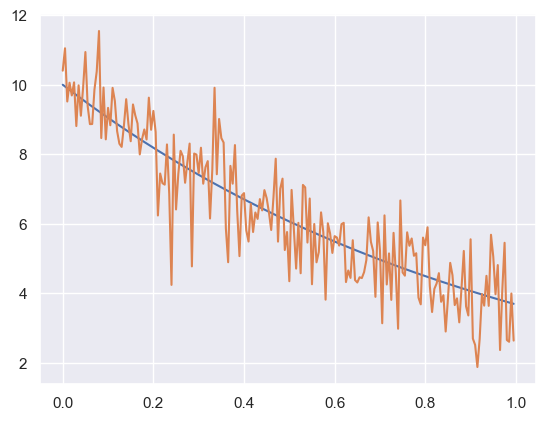

In [3]:
n = 200
t = np.arange(n) / n
y = np.exp(-t) * 10
y_noisy = y + np.random.normal(scale=1.0, size=n)
plt.plot(t, y)
plt.plot(t, y_noisy);

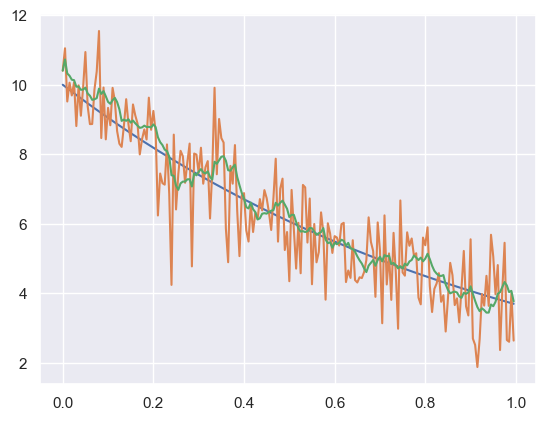

In [8]:
n_smooth = 10

smoother = Smoother('ma', n_smooth)
y_ma = [smoother(metric) for metric in y_noisy]
plt.plot(t, y)
plt.plot(t, y_noisy);
plt.plot(t, y_ma);

# Test on real data

In [5]:
stats = pd.read_csv('../models/hw-checkpoints/run-20240426-192838/stats.csv',index_col=0)
stats.head()

,train/mean_loss_total_a,train/mean_loss_ce_a,train/mean_loss_features_a,train/accuracy_a,val/mean_loss_total_a,val/mean_loss_ce_a,val/mean_loss_features_a,val/accuracy_a,val/mean_obj_score_a,param/lr_a,...,train/mean_loss_total_c,train/mean_loss_ce_c,train/mean_loss_features_c,train/accuracy_c,val/mean_loss_total_c,val/mean_loss_ce_c,val/mean_loss_features_c,val/accuracy_c,val/mean_obj_score_c,param/lr_c
0,0.798564,0.695666,0.102898,0.596567,3.665927,0.705111,2.960816,0.63,0.558764,0.0001,...,0.847729,0.744056,0.103672,0.525751,2.618016,0.661745,1.956270,0.60,0.553682,0.0001
1,0.716053,0.629094,0.086959,0.644850,2.950904,0.586902,2.364003,0.65,0.561368,0.0001,...,0.779590,0.692390,0.087200,0.564378,2.764125,0.764166,1.999959,0.59,0.596485,0.0001
2,0.662871,0.586522,0.076348,0.699571,2.883172,0.622280,2.260891,0.69,0.563785,0.0001,...,0.730902,0.657004,0.073898,0.631974,2.029153,0.609638,1.419514,0.65,0.629870,0.0001
3,0.634045,0.571051,0.062993,0.712446,2.908717,0.922210,1.986507,0.63,0.559718,0.0001,...,0.652207,0.596940,0.055267,0.682403,3.141889,0.870748,2.271141,0.61,0.725883,0.0001
4,0.618803,0.559626,0.059176,0.707082,2.304318,0.795724,1.508594,0.63,0.577237,0.0001,...,0.612701,0.562551,0.050151,0.714592,17.725730,6.955089,10.770641,0.51,0.795059,0.0001


(0.0, 3.0)

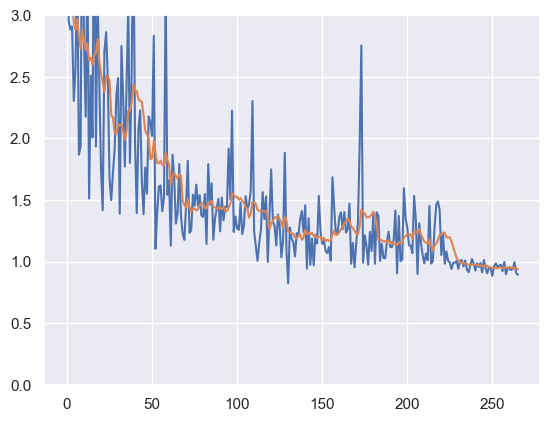

In [9]:
loss = stats['val/mean_loss_total_a'].dropna().to_numpy()

n_smooth = 10

smoother = Smoother('ma', n_smooth)
y_ma = [smoother(metric) for metric in loss]

plt.plot(loss)
plt.plot(y_ma);
plt.ylim(0, 3)

In [11]:
d = {'a': 1, 'b': 2}
for k in ('c', *d.keys()):
    print(k)

c
a
b


In [14]:
all(d.values())

True